# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [1]:
# First Round Initializations (Global Level) #
#============================================#
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Using TensorFlow backend.


Parameter Grids Build and Loaded!
Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


When generating data...you may use one of the following options:
- For evaluating non-localy patterns: "nonlocality"
- For evaluating model performance when faced with non-stationary osculatory behaviour: "oscilatory"
- For evaluating jump-type performance when faced with a discontinuity: "jumpdiscontinuity"
- For fun: "the_nightmare"

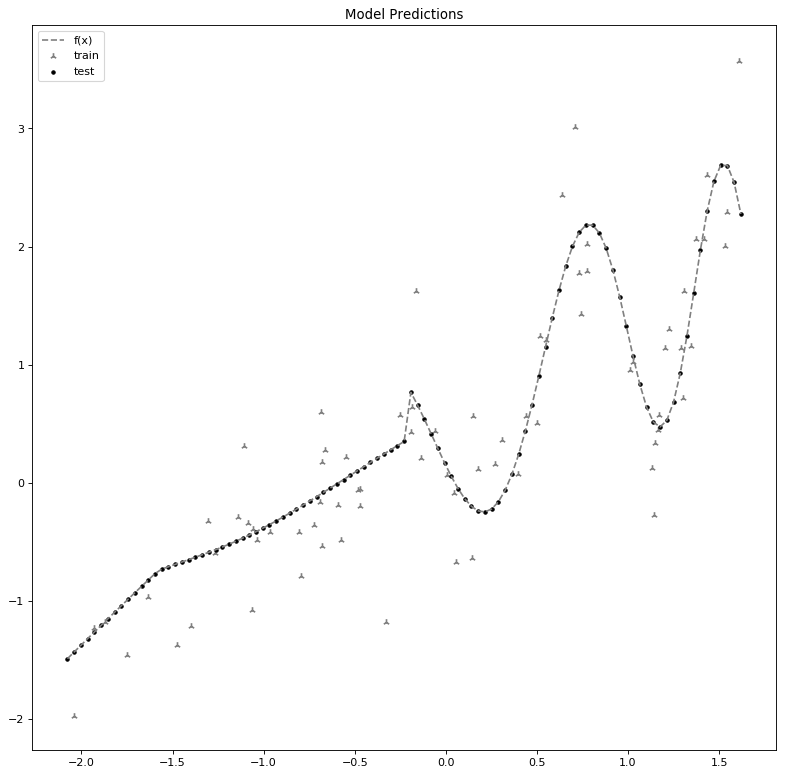

Simulation Confiugration Information:
 
We're plotting the function: the_nightmare with 0.5 additive noise, a distortion/model uncertainty level of0, and an out-of sample window on either side of the input space of:0.01.  We train using 100 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


In [2]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "the_nightmare"
# %run Data_Generator.ipynb
exec(open('Data_Generator.py').read())

**TEMP:**

Data Driven Robustness Rule:
Using [this article](https://www.sciencedirect.com/science/article/pii/S0378375815000403) for the variance estimate.  
$$
\hat{\sigma}^2 \triangleq
\frac1{(n-1)}\sum_{1<n\leq N} (y_n - y_{n-1})^2
.
$$

We couple it to the problem via the following
$$
\underset{\underset{0\leq w_n\leq 1}{\sum_{n\leq N} w_n=1}}{\operatorname{argmax}} \sum_{n\leq N} w_n L(f(x_n),\hat{f}(x_n),x_n) - \sigma^2 \sum_{n\leq N} w_n \ln\left(\frac{w_n}{N}\right)
.
$$

In [3]:
# GET STATISTICAL VARIANCE ESTIMATE
var_estimate = np.sum(np.diff(data_y)**2)/(((data_y.shape[0])-1))
var_estimate = np.float(round(var_estimate,3))

robustness_dictionary = {'robustness_parameter': [var_estimate,var_estimate*2,var_estimate*3]}
#==================================================================================#        
### Create NEU parameter disctionary by parameters joining model it is upgrading ###
#==================================================================================#
param_grid_Vanilla_Nets = {**Training_dictionary,
                       **Vanilla_ffNN_dictionary,
                       **Epochs_dictionary}

param_grid_NEU_Nets = {**Training_dictionary,
                       **robustness_dictionary,
                       **Vanilla_ffNN_dictionary,
                       **param_grid_NEU_readout_extra_parameters,
                       **param_grid_NEU_feature_extra_parameters,
                       **NEU_Epochs_Feature_dictionary_coupled}

param_grid_NEU_Feature_Only_Nets = {**Training_dictionary,
                                    **robustness_dictionary,
                                    **param_grid_NEU_feature_extra_parameters,
                                    **NEU_Epochs_Feature_dictionary}

NEU_Structure_Dictionary = {**Training_dictionary,
                            **robustness_dictionary,
                            **param_grid_NEU_readout_extra_parameters,
                            **NEU_Epochs_dictionary}

# Benchmark Models

Run univariate regression benchmarks file:

In [4]:
# %run Univariate_Regression_Benchmark_Models.ipynb
exec(open('Univariate_Regression_Benchmark_Models.py').read())

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.1051s.) Setting batch_size=2.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.3s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.2s finished


Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9133 - mse: 1.4422 - mae: 0.9133 - mape: 101.4405
Epoch 2/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9132 - mse: 1.4417 - mae: 0.9132 - mape: 101.4250
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9131 - mse: 1.4413 - mae: 0.9131 - mape: 101.4100
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9129 - mse: 1.4408 - mae: 0.9129 - mape: 101.3876
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9128 - mse: 1.4404 - mae: 0.9128 - mape: 101.3729
Epoch 6/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9127 - mse: 1.4400 - mae: 0.9127 - mape: 101.3536
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9125 - mse: 1.4395 - mae: 0.9125 - mape: 101.3366
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9124 - mse: 1.4391 - mae: 0.9124 - mape: 101.3192
Epoch 9/100
2/2 

2/2 [==============================] - 0s 2ms/step - loss: 0.9042 - mse: 1.4138 - mae: 0.9042 - mape: 100.2312
Epoch 68/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9040 - mse: 1.4133 - mae: 0.9040 - mape: 100.2061
Epoch 69/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9039 - mse: 1.4128 - mae: 0.9039 - mape: 100.1822
Epoch 70/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9037 - mse: 1.4123 - mae: 0.9037 - mape: 100.1630
Epoch 71/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9036 - mse: 1.4118 - mae: 0.9036 - mape: 100.1412
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9034 - mse: 1.4113 - mae: 0.9034 - mape: 100.1220
Epoch 73/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9032 - mse: 1.4108 - mae: 0.9032 - mape: 100.1017
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9031 - mse: 1.4102 - mae: 0.9031 - mape: 100.0775
Epoch 75/100
2/2 [===

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [5]:
# Second Round Re-Initializations (Global Level) #
#================================================#
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


#### Boost input dimension if $d=1$, so that reconfigurations can be universal.

In [6]:
if d<= 1:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    # Bump Dimension so Reconfiguration network properties hold
    data_x = np.concatenate([data_x,data_x],axis=1)
    data_x_test = np.concatenate([data_x_test,data_x_test],axis=1)
    d = d+1
else:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    print("Modified Input since Dimension is too low")

---
# Train Feature Map for "decoupled" NEU-*Model(s)*
---

We train NEU's universal linearizing feature map.

In [7]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   19.3s finished


Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 1.6244 - mse: 1.4856 - mae: 0.9341 - mape: 105.7575
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 1.5714 - mse: 1.4845 - mae: 0.9337 - mape: 105.6997
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 1.6084 - mse: 1.4836 - mae: 0.9334 - mape: 105.6424
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 1.6467 - mse: 1.4826 - mae: 0.9330 - mape: 105.5904
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 1.6488 - mse: 1.4815 - mae: 0.9327 - mape: 105.5353
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 1.5924 - mse: 1.4805 - mae: 0.9323 - mape: 105.4783
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 1.6462 - mse: 1.4795 - mae: 0.9320 - mape: 105.4274
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 1.6305 - mse: 1.4785 - mae: 0.9316 - mape: 105.3712
Epoch 9/100
2/

2/2 [==============================] - 0s 7ms/step - loss: 1.5714 - mse: 1.4184 - mae: 0.9100 - mape: 102.0049
Epoch 68/100
2/2 [==============================] - 0s 6ms/step - loss: 1.5900 - mse: 1.4176 - mae: 0.9097 - mape: 101.9542
Epoch 69/100
2/2 [==============================] - 0s 9ms/step - loss: 1.5733 - mse: 1.4165 - mae: 0.9093 - mape: 101.8914
Epoch 70/100
2/2 [==============================] - 0s 8ms/step - loss: 1.5877 - mse: 1.4155 - mae: 0.9089 - mape: 101.8274
Epoch 71/100
2/2 [==============================] - 0s 6ms/step - loss: 1.5852 - mse: 1.4145 - mae: 0.9086 - mape: 101.7735
Epoch 72/100
2/2 [==============================] - 0s 5ms/step - loss: 1.5565 - mse: 1.4133 - mae: 0.9081 - mape: 101.7109
Epoch 73/100
2/2 [==============================] - 0s 5ms/step - loss: 1.5754 - mse: 1.4125 - mae: 0.9078 - mape: 101.6637
Epoch 74/100
2/2 [==============================] - 0s 5ms/step - loss: 1.5449 - mse: 1.4114 - mae: 0.9074 - mape: 101.6045
Epoch 75/100
2/2 [===

---
# Linear Model(s)
---

### NEU-Linear *(decoupled implementation)*

In [8]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
#====================================#
# Ordinary Linear Regression Version #
#====================================#
# NEU_lin_reg = LinearRegression()
# NEU_lin_reg.fit(data_x_featured_train,data_y)

#=====================#
# Elastic Net Version #
#=====================#
# Block warnings that spam when performing coordinate descent (by default) in 1-d.
import warnings
warnings.filterwarnings("ignore")
# Initialize Elastic Net Regularization Model
NEU_lin_reg = ElasticNetCV(cv=5, random_state=0, alphas = np.linspace(0,(10**2),(10**2)),
                           l1_ratio=np.linspace(0,1,(10**2)))
# Fit Elastic Net Model
NEU_lin_reg.fit(data_x_featured_train,data_y)

ElasticNetCV(alphas=array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.2828...
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [9]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   13.4s finished


Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 1.6124 - mse: 1.5508 - mae: 0.9567 - mape: 109.2325
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 1.5553 - mse: 1.5491 - mae: 0.9561 - mape: 109.1450
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5951 - mse: 1.5477 - mae: 0.9556 - mape: 109.0580
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 1.6345 - mse: 1.5461 - mae: 0.9551 - mape: 108.9813
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6369 - mse: 1.5444 - mae: 0.9545 - mape: 108.8975
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 1.5771 - mse: 1.5428 - mae: 0.9540 - mape: 108.8110
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6338 - mse: 1.5412 - mae: 0.9534 - mape: 108.7344
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 1.6177 - mse: 1.5397 - mae: 0.9529 - mape: 108.6500
Epoch 9/100
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 1.5365 - mse: 1.4431 - mae: 0.9191 - mape: 103.4486
Epoch 67/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5435 - mse: 1.4414 - mae: 0.9185 - mape: 103.3440
Epoch 68/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5619 - mse: 1.4396 - mae: 0.9178 - mape: 103.2343
Epoch 69/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5448 - mse: 1.4379 - mae: 0.9172 - mape: 103.1387
Epoch 70/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5588 - mse: 1.4361 - mae: 0.9166 - mape: 103.0472
Epoch 71/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5559 - mse: 1.4343 - mae: 0.9159 - mape: 102.9563
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5265 - mse: 1.4327 - mae: 0.9153 - mape: 102.8472
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 1.5453 - mse: 1.4308 - mae: 0.9147 - mape: 102.7538
Epoch 74/100
2/2 [===

#### Visual Comaprison between the OLS and the NEU-OLS models:

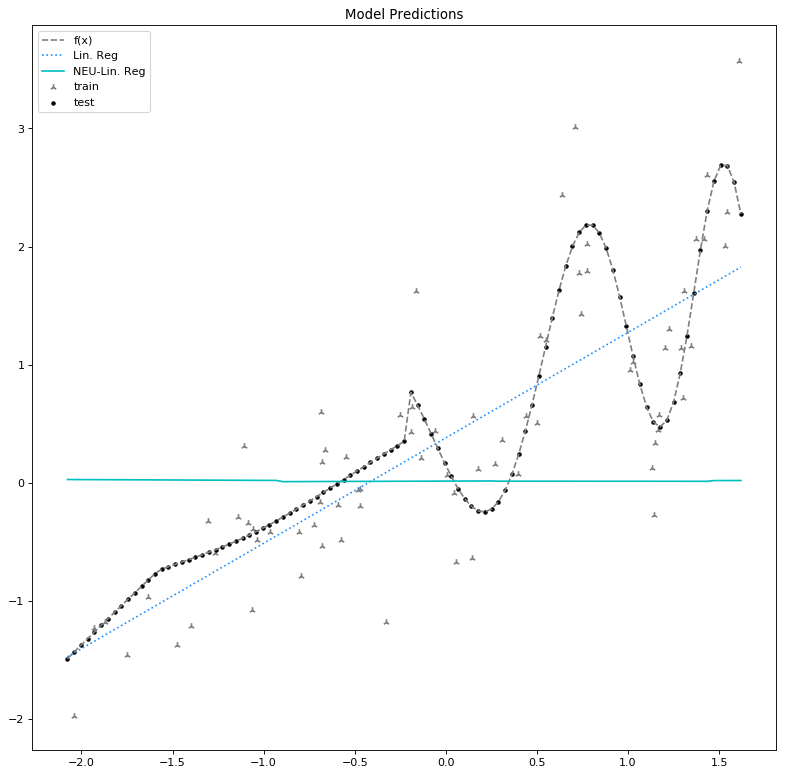

In [10]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU-Lin. Reg')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

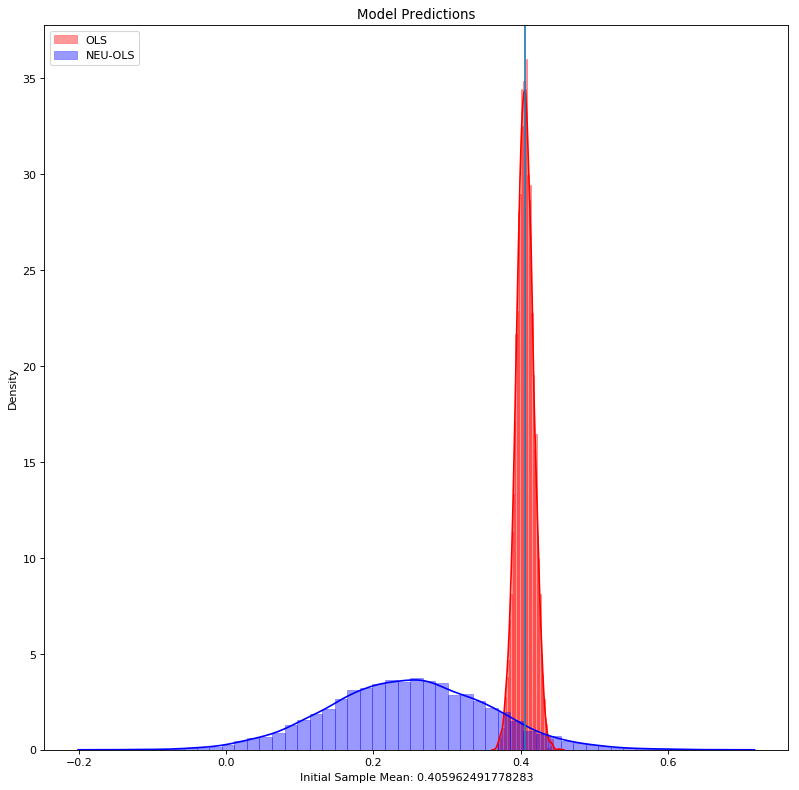

In [11]:
get_Error_distribution_plots(data_y_test,ENET_OLS_y_hat_test,NEU_OLS_y_hat_test,"OLS")

#### Comparison between Elastic-Net and NEU-ENET

In [12]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Elastic-Net Performance:")
print(reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-ENET Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

Elastic-Net Performance:
                 Train       Test
Er. 95L  -1.518501e-01   0.002722
Er. Mean -7.401487e-17   0.097996
Er. 95U   1.562719e-01   0.189203
MAE       5.054854e-01   0.373972
MSE       4.491283e-01   0.235674
MAPE      1.094750e+02  82.152645
NEU-ENET Performance:
                Train         Test
Er. 95L      0.124085     0.054938
Er. Mean     0.365309     0.257673
Er. 95U      0.626563     0.460829
MAE          0.895904     0.835895
MSE          1.379601     1.201214
MAPE      5586.987589  4964.556299


---
# Non-Linear Models
---

### NEU-Smoothing Splines

In [13]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test = get_smooting_splines(data_x = (data_x_NEU_train_feature_only.mean(axis=1)),
                                                                                       data_x_test = (data_x_NEU_test_feature_only.mean(axis=1)),
                                                                                       data_y = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_Ssplines = np.concatenate([data_x_featured_train,
                                   NEU_Ssplines_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_Ssplines = np.concatenate([data_x_featured_test,
                                  NEU_Ssplines_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_Ssplines_y_hat_train, NEU_Ssplines_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_Ssplines, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_Ssplines)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   12.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   12.8s finished


Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3372 - mse: 1.1697 - mae: 0.8166 - mape: 92.5574
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3034 - mse: 1.1678 - mae: 0.8160 - mape: 92.5153
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3255 - mse: 1.1663 - mae: 0.8154 - mape: 92.5052
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3572 - mse: 1.1646 - mae: 0.8148 - mape: 92.4837
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3568 - mse: 1.1629 - mae: 0.8142 - mape: 92.4592
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3176 - mse: 1.1611 - mae: 0.8136 - mape: 92.4419
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3543 - mse: 1.1595 - mae: 0.8130 - mape: 92.4107
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3400 - mse: 1.1578 - mae: 0.8123 - mape: 92.3875
Epoch 9/100
2/2 [=======

2/2 [==============================] - 0s 3ms/step - loss: 1.2419 - mse: 1.0446 - mae: 0.7704 - mape: 90.5200
Epoch 68/100
2/2 [==============================] - 0s 4ms/step - loss: 1.2572 - mse: 1.0447 - mae: 0.7704 - mape: 90.5407
Epoch 69/100
2/2 [==============================] - 0s 3ms/step - loss: 1.2390 - mse: 1.0417 - mae: 0.7695 - mape: 90.4983
Epoch 70/100
2/2 [==============================] - 0s 5ms/step - loss: 1.2512 - mse: 1.0404 - mae: 0.7687 - mape: 90.4781
Epoch 71/100
2/2 [==============================] - 0s 7ms/step - loss: 1.2485 - mse: 1.0378 - mae: 0.7679 - mape: 90.4473
Epoch 72/100
2/2 [==============================] - 0s 4ms/step - loss: 1.2284 - mse: 1.0343 - mae: 0.7664 - mape: 90.2697
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 1.2388 - mse: 1.0341 - mae: 0.7665 - mape: 90.4804
Epoch 74/100
2/2 [==============================] - 0s 3ms/step - loss: 1.2153 - mse: 1.0311 - mae: 0.7656 - mape: 90.4260
Epoch 75/100
2/2 [===========

#### Visual Comaprison between the Smoothing Splines and the NEU-Smoothing Splines models:

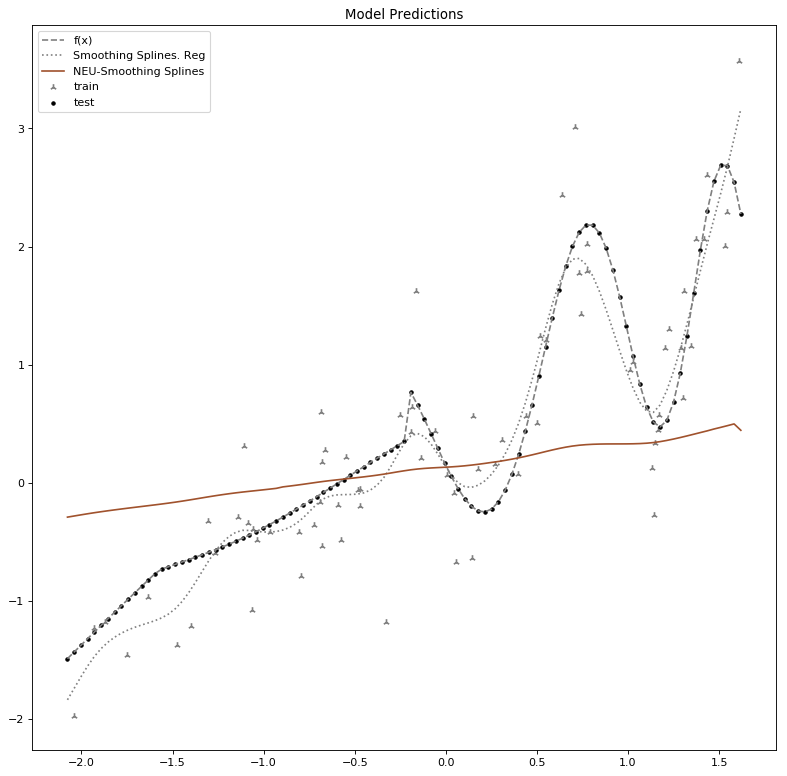

In [14]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test, color = 'grey',linestyle=":", label='Smoothing Splines. Reg')
#plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_Ssplines_y_hat_test, color = 'sienna',label='NEU-Smoothing Splines')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/OLS.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

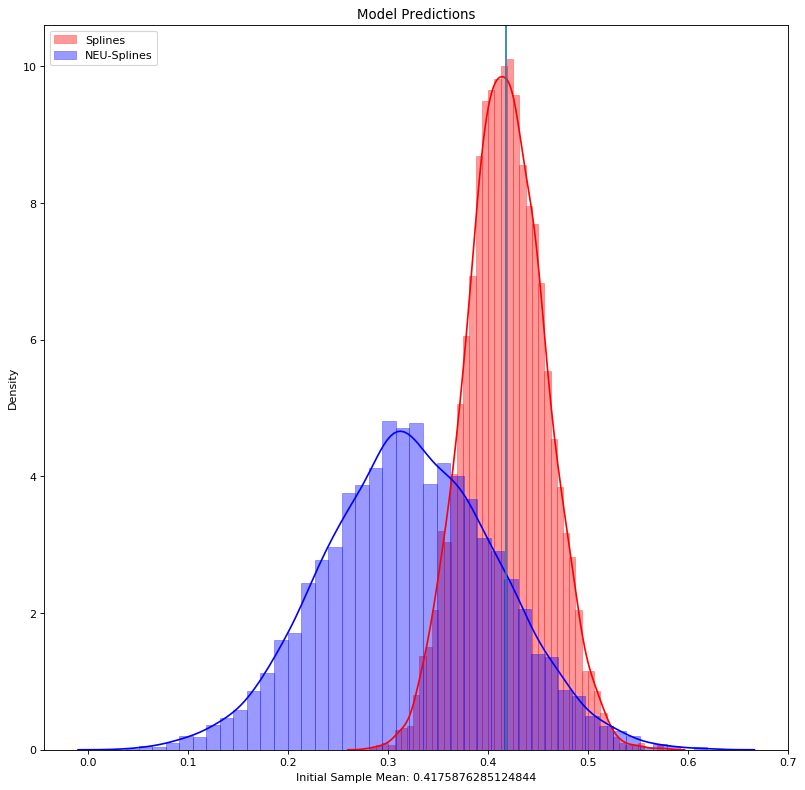

In [15]:
get_Error_distribution_plots(data_y_test,f_hat_smoothing_splines_test,NEU_Ssplines_y_hat_test,"Splines")

#### Numerical Comparison between the Smoothing Splines regressor and NEU-Smoothing Splines regressor models:

In [16]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Smoothing Splines Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Smoothing Splines Performance:")
print(reporter(NEU_Ssplines_y_hat_train,NEU_Ssplines_y_hat_test,data_y,data_y_test))

Smoothing Splines Performance:
                 Train        Test
Er. 95L  -9.547157e-02    0.040202
Er. Mean  4.855375e-15    0.086371
Er. 95U   9.489287e-02    0.130008
MAE       3.168679e-01    0.202485
MSE       1.765063e-01    0.061832
MAPE      2.001017e+02  123.122006
NEU-Smoothing Splines Performance:
               Train        Test
Er. 95L     0.023612    0.009015
Er. Mean    0.238878    0.180330
Er. 95U     0.456154    0.354927
MAE         0.745314    0.664178
MSE         0.976222    0.782805
MAPE      945.764610  409.461486


### NEU-Kernel Ridge Regression *(decoupled implementation)*

In [17]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_KReg_y_hat_train,NEU_KReg_y_hat_test, NEU_KReg_model = get_Kernel_Ridge_Regressor(data_x_in = data_x_featured_train,
                                                                                       data_x_test_in = data_x_featured_test,
                                                                                       data_y_in = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_KReg = np.concatenate([data_x_featured_train,
                                   NEU_KReg_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_KReg = np.concatenate([data_x_featured_test,
                                  NEU_KReg_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_KReg_y_hat_train, NEU_KReg_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_KReg, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_KReg)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0226s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.7s finished


Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 1.4708 - mse: 1.3511 - mae: 0.8864 - mape: 98.6795
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 1.4241 - mse: 1.3481 - mae: 0.8854 - mape: 98.5617
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 1.4542 - mse: 1.3456 - mae: 0.8845 - mape: 98.4469
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 1.4876 - mse: 1.3428 - mae: 0.8836 - mape: 98.3382
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 1.4874 - mse: 1.3400 - mae: 0.8827 - mape: 98.2316
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 1.4375 - mse: 1.3372 - mae: 0.8818 - mape: 98.1217
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 1.4824 - mse: 1.3345 - mae: 0.8808 - mape: 98.0220
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 1.4667 - mse: 1.3315 - mae: 0.8799 - mape: 97.9189
Epoch 9/100
2/2 [=======

2/2 [==============================] - 0s 3ms/step - loss: 1.3189 - mse: 1.1615 - mae: 0.8220 - mape: 91.2882
Epoch 68/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3330 - mse: 1.1589 - mae: 0.8204 - mape: 90.9439
Epoch 69/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3170 - mse: 1.1551 - mae: 0.8195 - mape: 91.0507
Epoch 70/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3270 - mse: 1.1538 - mae: 0.8192 - mape: 91.0489
Epoch 71/100
2/2 [==============================] - 0s 3ms/step - loss: 1.3238 - mse: 1.1507 - mae: 0.8178 - mape: 90.8227
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 1.2993 - mse: 1.1469 - mae: 0.8169 - mape: 90.8258
Epoch 73/100
2/2 [==============================] - 0s 4ms/step - loss: 1.3120 - mse: 1.1434 - mae: 0.8152 - mape: 90.4590
Epoch 74/100
2/2 [==============================] - 0s 2ms/step - loss: 1.2875 - mse: 1.1397 - mae: 0.8141 - mape: 90.3959
Epoch 75/100
2/2 [===========

#### Visual Comaprison between the Kernel Ridge Regression and the NEU-Kernel Ridge Regression models:

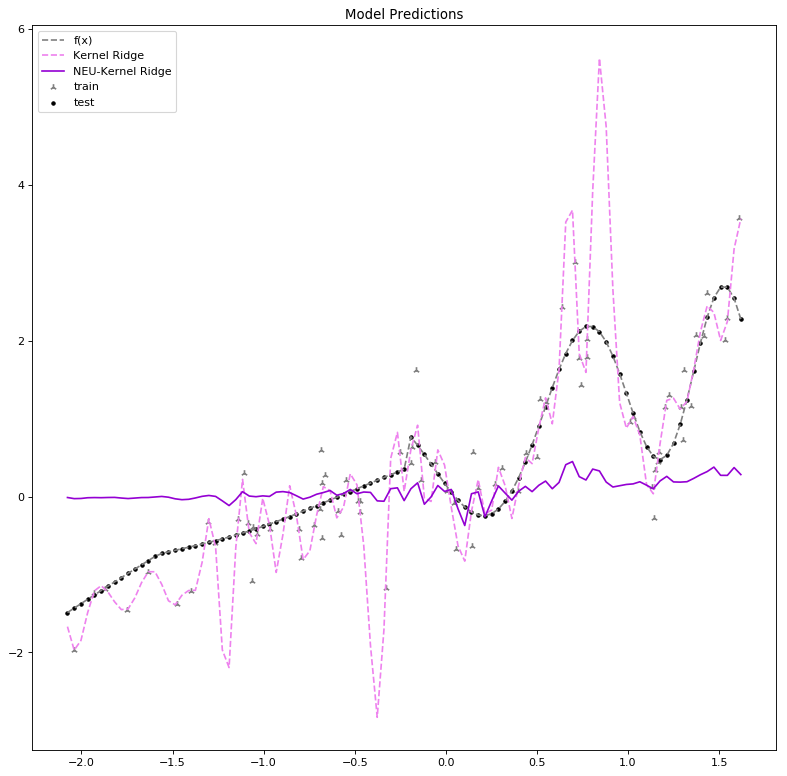

In [18]:
# Initialize Plot #
#-----------------#
fig = plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Kernel_Ridge.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

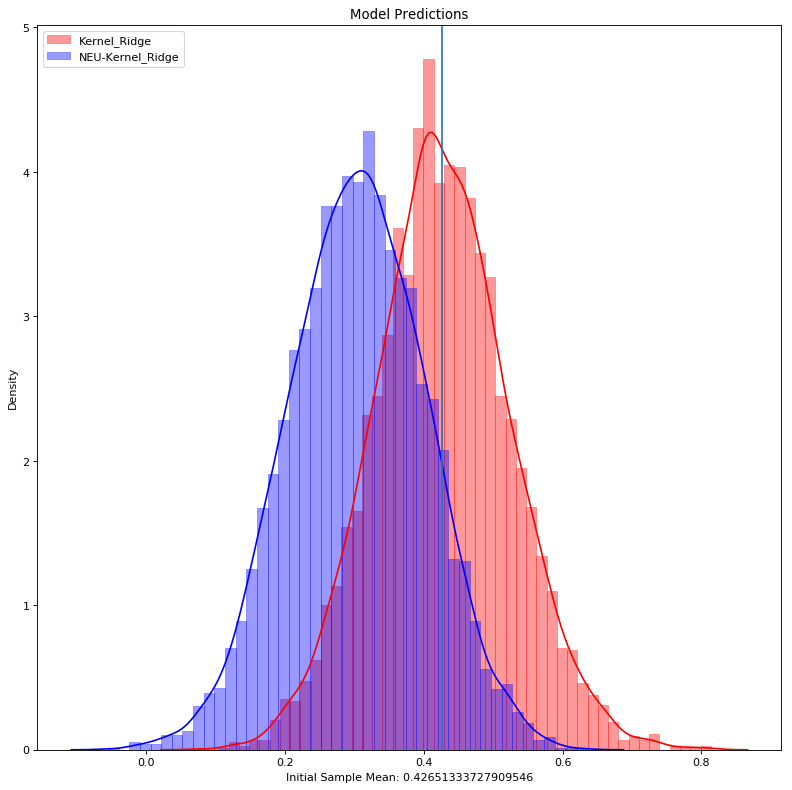

In [19]:
get_Error_distribution_plots(data_y_test,f_hat_kernel_ridge_test,NEU_KReg_y_hat_test,"Kernel_Ridge")

#### Numerical Comparison between the Kernel Ridge regressor and NEU-Kernel Ridge regressor models:

In [20]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
                Train        Test
Er. 95L     -0.047610   -0.080353
Er. Mean     0.000064    0.077445
Er. 95U      0.047723    0.232928
MAE          0.137271    0.504584
MSE          0.045157    0.651006
MAPE      1808.662373  124.257265
NEU-Kernel Ridge-Performance:
                Train         Test
Er. 95L      0.070519     0.015550
Er. Mean     0.290428     0.200131
Er. 95U      0.514983     0.383846
MAE          0.787257     0.752871
MSE          1.066704     0.957921
MAPE      4110.531143  3326.027685


## Tree Model(s):
*Naturally, all of these have a decoupled implementation*.

In [21]:
# TEMP
exec(open('HyperParameter_Grid.py').read())

Parameter Grids Build and Loaded!


In [22]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test, GBRF_w_NEU_features = get_GBRF(X_train = data_x_featured_train,
                                                                         X_test = data_x_featured_test,
                                                                         y_train = data_y)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train_GBRF = np.concatenate([data_x_featured_train,
                                   NEU_GBRF_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test_GBRF = np.concatenate([data_x_featured_test,
                                  NEU_GBRF_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
# ========================#
NEU_GBRF_y_hat_train, NEU_GBRF_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                                n_jobs = n_jobs, 
                                                                n_iter = n_iter, 
                                                                param_grid_in = NEU_Structure_Dictionary, 
                                                                X_train = data_x_NEU_train_GBRF, 
                                                                y_train = data_y,
                                                                X_test = data_x_NEU_test_GBRF)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Batch computation too fast (0.0750s.) Setting batch_size=2.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    8.3s finished


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9682 - mse: 1.5854 - mae: 0.9682 - mape: 111.7752
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9677 - mse: 1.5837 - mae: 0.9677 - mape: 111.7160
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9672 - mse: 1.5824 - mae: 0.9672 - mape: 111.6512
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9667 - mse: 1.5808 - mae: 0.9667 - mape: 111.5898
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9662 - mse: 1.5792 - mae: 0.9662 - mape: 111.5230
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9657 - mse: 1.5776 - mae: 0.9657 - mape: 111.4633
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9652 - mse: 1.5761 - mae: 0.9652 - mape: 111.3973
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9647 - mse: 1.5747 - mae: 0.9647 - mape: 111.3355
Epoch 9/100
2/2 

2/2 [==============================] - 0s 5ms/step - loss: 0.9339 - mse: 1.4836 - mae: 0.9339 - mape: 107.3076
Epoch 68/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9336 - mse: 1.4827 - mae: 0.9336 - mape: 107.2757
Epoch 69/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9330 - mse: 1.4809 - mae: 0.9330 - mape: 107.1822
Epoch 70/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9324 - mse: 1.4794 - mae: 0.9324 - mape: 107.0945
Epoch 71/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9319 - mse: 1.4778 - mae: 0.9319 - mape: 107.0285
Epoch 72/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9312 - mse: 1.4757 - mae: 0.9312 - mape: 106.9522
Epoch 73/100
2/2 [==============================] - 0s 5ms/step - loss: 0.9309 - mse: 1.4747 - mae: 0.9309 - mape: 106.9028
Epoch 74/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9303 - mse: 1.4730 - mae: 0.9303 - mape: 106.8410
Epoch 75/100
2/2 [===

#### Visual Comaprison between the GBRF and the NEU-GBRF models:

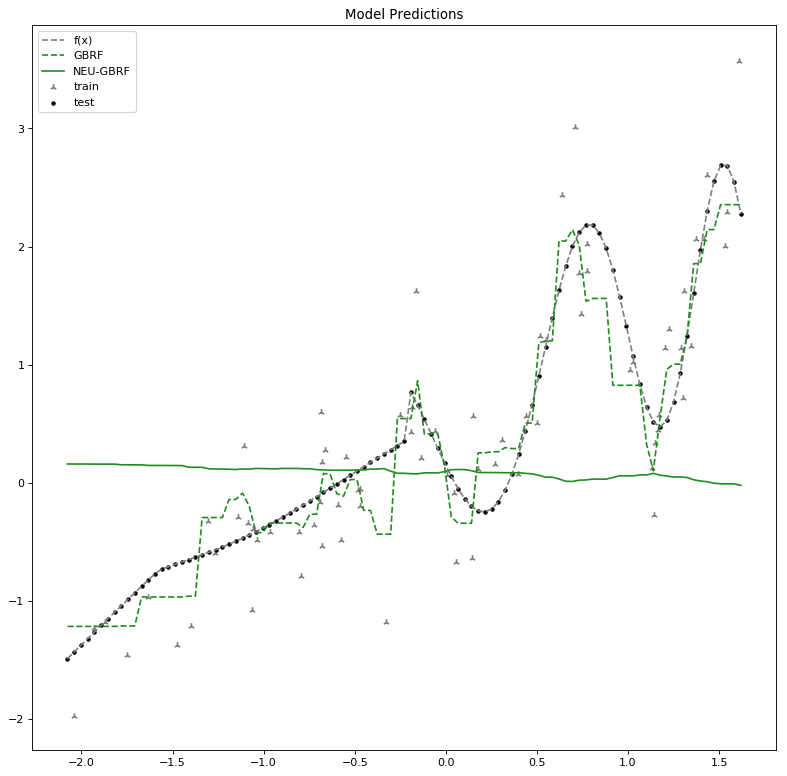

In [23]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#----------#
# Model(s) #
#----------#
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, linestyle="--", color = 'forestgreen', label='GBRF')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")


# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/GBRF.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

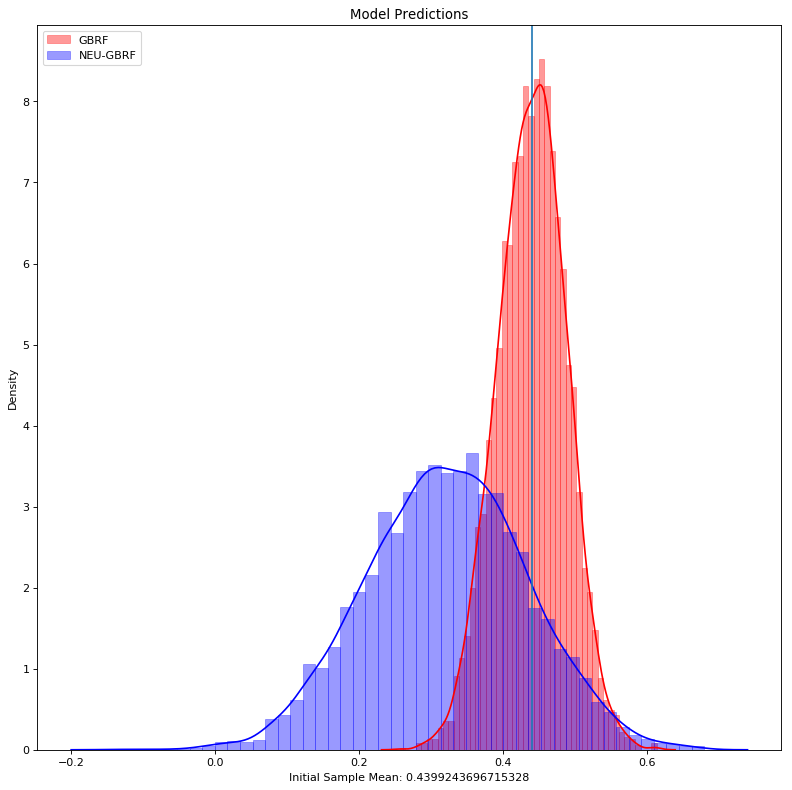

In [24]:
get_Error_distribution_plots(data_y_test,GBRF_y_hat_test,NEU_GBRF_y_hat_test,"GBRF")

#### Numerical Comparison between the GBRF and NEU-GBRF models:

In [25]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
                 Train       Test
Er. 95L  -7.216466e-02   0.004672
Er. Mean  2.368476e-17   0.064034
Er. 95U   7.513807e-02   0.122390
MAE       2.351193e-01   0.247554
MSE       1.067203e-01   0.096297
MAPE      9.000464e+01  65.077098
NEU-GBRF-Performance:
                Train         Test
Er. 95L      0.041514    -0.031672
Er. Mean     0.296181     0.182633
Er. 95U      0.559317     0.400552
MAE          0.916017     0.869002
MSE          1.431009     1.259285
MAPE      5621.454693  3731.798235


---
## Neural Networks: 
---
### NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

Here we only use reconfiguration networks to learn an appropriate readout map.

In [26]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   32.4s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   32.4s finished


Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8958 - mse: 1.3714 - mae: 0.8958 - mape: 100.7723
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8954 - mse: 1.3702 - mae: 0.8954 - mape: 100.7088
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8950 - mse: 1.3692 - mae: 0.8950 - mape: 100.6507
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8947 - mse: 1.3681 - mae: 0.8947 - mape: 100.6371
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8942 - mse: 1.3668 - mae: 0.8942 - mape: 100.5712
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8938 - mse: 1.3657 - mae: 0.8938 - mape: 100.5158
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8934 - mse: 1.3647 - mae: 0.8934 - mape: 100.4650
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 0.8931 - mse: 1.3637 - mae: 0.8931 - mape: 100.4163
Epoch 9/100
2/2 

2/2 [==============================] - 0s 6ms/step - loss: 0.8719 - mse: 1.3007 - mae: 0.8719 - mape: 100.6161
Epoch 68/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8716 - mse: 1.2996 - mae: 0.8716 - mape: 100.6608
Epoch 69/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8712 - mse: 1.2984 - mae: 0.8712 - mape: 100.6680
Epoch 70/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8708 - mse: 1.2973 - mae: 0.8708 - mape: 100.6830
Epoch 71/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8704 - mse: 1.2961 - mae: 0.8704 - mape: 100.7110
Epoch 72/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8701 - mse: 1.2950 - mae: 0.8701 - mape: 100.7327
Epoch 73/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8697 - mse: 1.2939 - mae: 0.8697 - mape: 100.7978
Epoch 74/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8693 - mse: 1.2927 - mae: 0.8693 - mape: 100.8183
Epoch 75/100
2/2 [===

---

**Note:** The following two models are purely out of personal curiosity and are not included in the paper.  Feel free to use them, they perform well. 

---

#### B) $\pi\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$
Here we use reconfigurations to learn an appropriate structure map. 

In [27]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   26.5s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   26.5s finished


Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8842 - mse: 1.3276 - mae: 0.8842 - mape: 105.1077
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8833 - mse: 1.3250 - mae: 0.8833 - mape: 105.0495
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8825 - mse: 1.3228 - mae: 0.8825 - mape: 105.0509
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8817 - mse: 1.3202 - mae: 0.8817 - mape: 105.0471
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8808 - mse: 1.3177 - mae: 0.8808 - mape: 105.0202
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8799 - mse: 1.3151 - mae: 0.8799 - mape: 105.0025
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8791 - mse: 1.3126 - mae: 0.8791 - mape: 104.9671
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 0.8782 - mse: 1.3101 - mae: 0.8782 - mape: 104.9518
Epoch 9/100
2/2 

2/2 [==============================] - 0s 8ms/step - loss: 0.8026 - mse: 1.1068 - mae: 0.8026 - mape: 101.4305
Epoch 67/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8001 - mse: 1.0998 - mae: 0.8001 - mape: 100.9208
Epoch 68/100
2/2 [==============================] - 0s 7ms/step - loss: 0.8002 - mse: 1.0999 - mae: 0.8002 - mape: 101.0248
Epoch 69/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7980 - mse: 1.0933 - mae: 0.7980 - mape: 100.8330
Epoch 70/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7955 - mse: 1.0892 - mae: 0.7955 - mape: 100.6189
Epoch 71/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7940 - mse: 1.0841 - mae: 0.7940 - mape: 100.5799
Epoch 72/100
2/2 [==============================] - 0s 6ms/step - loss: 0.7903 - mse: 1.0762 - mae: 0.7903 - mape: 99.9938
Epoch 73/100
2/2 [==============================] - 0s 7ms/step - loss: 0.7905 - mse: 1.0756 - mae: 0.7905 - mape: 100.5468
Epoch 74/100
2/2 [====

#### Decoupled Implementation

In [28]:
# tf.random.set_seed(2020)
# # 1+2) Learn Linearizing Feature Map #
# #====================================#
# # Completed Above
# print("Phase 1 Complete: Feature Map Trained/Loaded")

# # 2) Train ffNN #
# #===============#
# NEU_ffNN_y_hat_train_dcpld, NEU_ffNN_y_hat_test_dcpld = build_ffNN(n_folds = CV_folds, 
#                                                                    n_jobs = n_jobs, 
#                                                                    n_iter = n_iter, 
#                                                                    param_grid_in = param_grid_Vanilla_Nets,  
#                                                                    X_train = data_x_NEU_train_feature_only, 
#                                                                    y_train = data_y,
#                                                                    X_test = data_x_NEU_test_feature_only)
# # Pre-process Linearized Data #
# #=============================#
# # Get Linearized Predictions #
# #----------------------------#
# # Coerce data into form ready for NEU-Structure Map
# data_x_NEU_train = np.concatenate([data_x_featured_train,
#                                    NEU_ffNN_y_hat_train_dcpld.reshape(data_x_featured_train.shape[0],D)],axis=1)
# data_x_NEU_test = np.concatenate([data_x_featured_test,
#                                   NEU_ffNN_y_hat_test_dcpld.reshape(data_x_featured_test.shape[0],D)],axis=1)

# # Update User #
# #-------------#
# print("Phase 2 Complete: Trained Vanilla Model")

# # 3) Learn Structure Map #
# #========================#
# NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
#                                                            n_jobs = n_jobs, 
#                                                            n_iter = n_iter, 
#                                                            param_grid_in = NEU_Structure_Dictionary, 
#                                                            X_train = data_x_NEU_train, 
#                                                            y_train = data_y,
#                                                            X_test = data_x_NEU_test)

# # Update User #
# #-------------#
# print("Phase 3 Complete: Trained NEU-Structure Map")
# print("NEU Statue: Trained")

Phase 1 Complete: Feature Map Trained/Loaded
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    3.7s finished


Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9073 - mse: 1.4215 - mae: 0.9073 - mape: 100.7530
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9070 - mse: 1.4206 - mae: 0.9070 - mape: 100.7095
Epoch 3/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9067 - mse: 1.4200 - mae: 0.9067 - mape: 100.6671
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 0.9065 - mse: 1.4192 - mae: 0.9065 - mape: 100.6362
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9062 - mse: 1.4184 - mae: 0.9062 - mape: 100.5935
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9059 - mse: 1.4176 - mae: 0.9059 - mape: 100.5522
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.9057 - mse: 1.4168 - mae: 0.9057 - mape: 100.5154
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9054 - mse: 1.4161 - mae: 0.9054 - mape: 100.4761
Epoch 9/100
2/2 

2/2 [==============================] - 0s 3ms/step - loss: 0.8894 - mse: 1.3707 - mae: 0.8894 - mape: 98.1247
Epoch 68/100
2/2 [==============================] - 0s 1ms/step - loss: 0.8891 - mse: 1.3699 - mae: 0.8891 - mape: 98.0748
Epoch 69/100
2/2 [==============================] - 0s 1ms/step - loss: 0.8888 - mse: 1.3691 - mae: 0.8888 - mape: 98.0313
Epoch 70/100
2/2 [==============================] - 0s 1ms/step - loss: 0.8885 - mse: 1.3682 - mae: 0.8885 - mape: 97.9903
Epoch 71/100
2/2 [==============================] - 0s 4ms/step - loss: 0.8882 - mse: 1.3674 - mae: 0.8882 - mape: 97.9512
Epoch 72/100
2/2 [==============================] - 0s 2ms/step - loss: 0.8879 - mse: 1.3666 - mae: 0.8879 - mape: 97.8993
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 0.8876 - mse: 1.3657 - mae: 0.8876 - mape: 97.8603
Epoch 74/100
2/2 [==============================] - 0s 3ms/step - loss: 0.8873 - mse: 1.3648 - mae: 0.8873 - mape: 97.8192
Epoch 75/100
2/2 [===========

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.1s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.1s finished


Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9771 - mse: 1.6038 - mae: 0.9771 - mape: 113.1015
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9767 - mse: 1.6026 - mae: 0.9767 - mape: 113.0415
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9763 - mse: 1.6017 - mae: 0.9763 - mape: 112.9803
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9760 - mse: 1.6006 - mae: 0.9760 - mape: 112.9325
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9756 - mse: 1.5994 - mae: 0.9756 - mape: 112.8699
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9752 - mse: 1.5983 - mae: 0.9752 - mape: 112.8080
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9748 - mse: 1.5972 - mae: 0.9748 - mape: 112.7508
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9745 - mse: 1.5962 - mae: 0.9745 - mape: 112.6865
Epoch 9/100
2/2 

2/2 [==============================] - 0s 5ms/step - loss: 0.9390 - mse: 1.4960 - mae: 0.9390 - mape: 106.9636
Epoch 68/100
2/2 [==============================] - 0s 9ms/step - loss: 0.9397 - mse: 1.4977 - mae: 0.9397 - mape: 107.0085
Epoch 69/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9384 - mse: 1.4936 - mae: 0.9384 - mape: 106.7001
Epoch 70/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9369 - mse: 1.4911 - mae: 0.9369 - mape: 106.4057
Epoch 71/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9363 - mse: 1.4883 - mae: 0.9363 - mape: 106.3352
Epoch 72/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9342 - mse: 1.4824 - mae: 0.9342 - mape: 106.0665
Epoch 73/100
2/2 [==============================] - 0s 3ms/step - loss: 0.9346 - mse: 1.4835 - mae: 0.9346 - mape: 106.1532
Epoch 74/100
2/2 [==============================] - 0s 4ms/step - loss: 0.9336 - mse: 1.4801 - mae: 0.9336 - mape: 105.9636
Epoch 75/100
2/2 [===

## Visualization

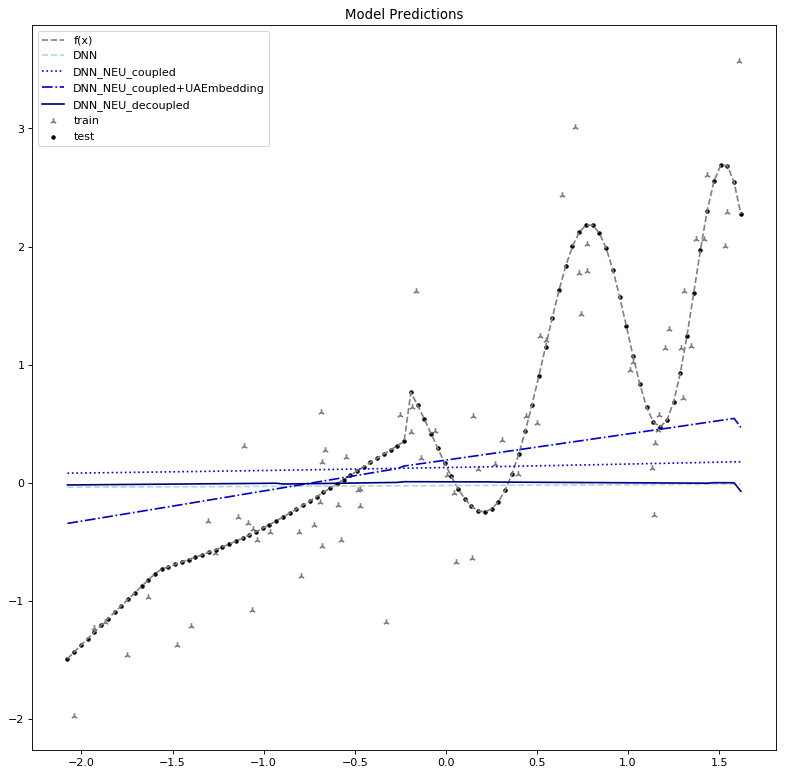

In [29]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Neural_Network_Models.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

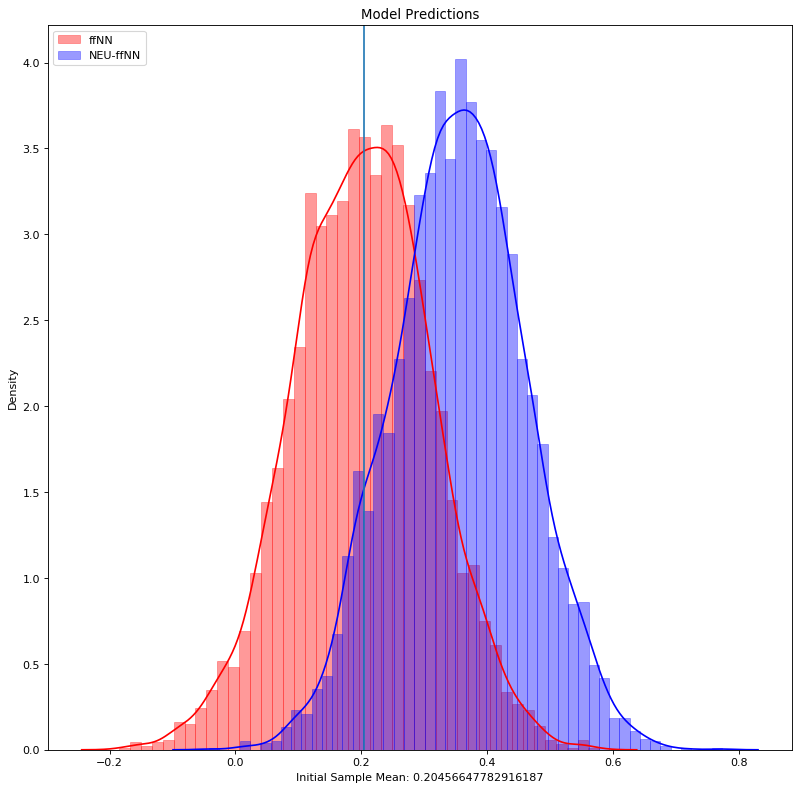

In [30]:
get_Error_distribution_plots(data_y_test,ffNN_y_hat_test,NEU_ffNN_y_hat_test,"ffNN")

---
---
---

---
# Result(s)
---

## Generate Results Table(s):

In [41]:
#==========#
# Training #
#==========#
train_performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,0],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,0],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,0],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,0]}).transpose()#,
#                                    "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,0]}).transpose()

train_performance.to_latex("./outputs/tables/Train_performance.tex")

#=========#
# Testing #
#=========#
test__performance  = pd.DataFrame({"Smoothin Splines": reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test).iloc[:,1],
                                   "LOESS": reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test).iloc[:,1],
#                                    "OLS": reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Elastic Net": reporter(ENET_OLS_y_hat_train,ENET_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-OLS": reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "Kernel": reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-KerRidge": reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "GBRF": reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-GBRF": reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "ffNN": reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Readout-Form)": reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test).iloc[:,1],
                                   "NEU-ffNN (Coupled)": reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test).iloc[:,1]}).transpose()#,
#                                    "NEU-ffNN (Decoupled)": reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test).iloc[:,1]}).transpose()

test__performance.to_latex("./outputs/tables/Test_performance.tex")

# Visualize Predictions

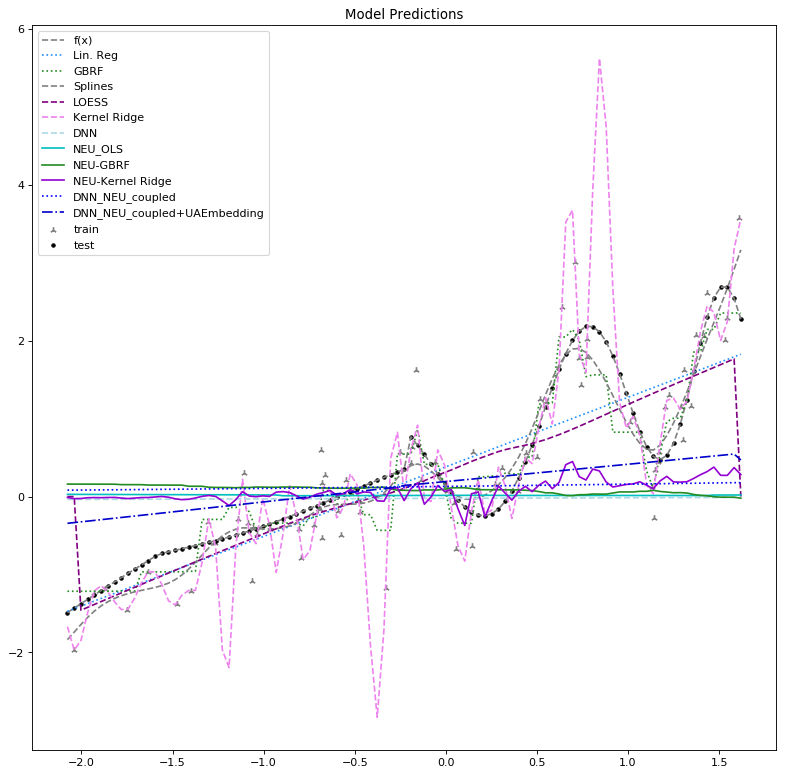

In [43]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x_raw).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test_raw).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Ordinary Linear Regression (OLS)
plt.plot(np.array(data_x_test_raw).reshape(-1,),ENET_OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='Lin. Reg')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),OLS_y_hat_test, color = 'dodgerblue',linestyle=":", label='OLS')
# Plot Gradient-Boosted Random Forest Regressor (GBRF):
plt.plot(np.array(data_x_test_raw).reshape(-1,),GBRF_y_hat_test, color = 'forestgreen',linestyle=":", label='GBRF')
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_smoothing_splines_test,color='grey',linestyle="--",label='Splines')
plt.plot(np.array(data_x_test_raw).reshape(-1,),LOESS_prediction_test,color='purple',linestyle="--",label='LOESS')
# Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),f_hat_kernel_ridge_test,color='violet',linestyle="--",label='Kernel Ridge')
# Plot ffNN
plt.plot(np.array(data_x_test_raw).reshape(-1,),ffNN_y_hat_test, color = 'lightblue',linestyle="--",  label='DNN')


#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
# Plot NEU-GBRF:
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_GBRF_y_hat_test, color = 'forestgreen',label='NEU-GBRF')
# NEU-Kernel Ridge Regressor
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_KReg_y_hat_test,color='darkviolet',label='NEU-Kernel Ridge')
# Plot NEU-ffNN (Training Variants)
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test, linestyle=":", color = 'b',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'mediumblue',linestyle='-.', label='DNN_NEU_coupled+UAEmbedding')
# plt.plot(np.array(data_x_test_raw).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')


# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")

# Export #
#--------#
# SAVE Figure to .eps
plt.savefig('./outputs/plotsANDfigures/Full_Picture.pdf', format='pdf')
# Show Plot
if is_visuallty_verbose == True:
    plt.show(block=False)

 ---

## Performance Report
- First, we print the comparison tables (so it can be viewed from the command-line if it is being run live on a grid/cluster/remotely).
- Second, we display the training and testing performances in clean dataframes.

In [44]:
#--------------------#
# Classical Model(s) #
#--------------------#
# OLS Performance
print("OLS-Performance:")
# print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
NEU-OLS-Performance:
                Train         Test
Er. 95L      0.122214     0.047797
Er. Mean     0.365309     0.257673
Er. 95U      0.626280     0.469143
MAE          0.895904     0.835895
MSE          1.379601     1.201214
MAPE      5586.987589  4964.556299


In [45]:
#-----------------------#
# Kernel Ridge Model(s) #
#-----------------------#
# Kernel Ridge Performance
print("Kernel Ridge-Performance:")
print(reporter(f_hat_kernel_ridge_train,f_hat_kernel_ridge_test,data_y,data_y_test))

# NEU-Kernel Ridge Performance
print("NEU-Kernel Ridge-Performance:")
print(reporter(NEU_KReg_y_hat_train,NEU_KReg_y_hat_test,data_y,data_y_test))

Kernel Ridge-Performance:
                Train        Test
Er. 95L     -0.047298   -0.080261
Er. Mean     0.000064    0.077445
Er. 95U      0.049517    0.229479
MAE          0.137271    0.504584
MSE          0.045157    0.651006
MAPE      1808.662373  124.257265
NEU-Kernel Ridge-Performance:
                Train         Test
Er. 95L      0.067641     0.013217
Er. Mean     0.290428     0.200131
Er. 95U      0.518096     0.390454
MAE          0.787257     0.752871
MSE          1.066704     0.957921
MAPE      4110.531143  3326.027685


In [46]:
#---------------#
# Tree Model(s) #
#---------------#
# GBRF Performance
print("GBRF-Performance:")
print(reporter(GBRF_y_hat_train,GBRF_y_hat_test,data_y,data_y_test))

# NEU-GBRF Performance
print("NEU-GBRF-Performance:")
print(reporter(NEU_GBRF_y_hat_train,NEU_GBRF_y_hat_test,data_y,data_y_test))

GBRF-Performance:
                 Train       Test
Er. 95L  -7.187872e-02   0.006243
Er. Mean  2.368476e-17   0.064034
Er. 95U   7.545002e-02   0.124848
MAE       2.351193e-01   0.247554
MSE       1.067203e-01   0.096297
MAPE      9.000464e+01  65.077098
NEU-GBRF-Performance:
                Train         Test
Er. 95L      0.037101    -0.023762
Er. Mean     0.296181     0.182633
Er. 95U      0.561917     0.403241
MAE          0.916017     0.869002
MSE          1.431009     1.259285
MAPE      5621.454693  3731.798235


In [47]:
#-----------------------------------------------------#
# Classical Non-Linear Univariate Regression Model(s) #
#-----------------------------------------------------#
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
                 Train        Test
Er. 95L  -9.424465e-02    0.040876
Er. Mean  4.855375e-15    0.086371
Er. 95U   9.583780e-02    0.131061
MAE       3.168679e-01    0.202485
MSE       1.765063e-01    0.061832
MAPE      2.001017e+02  123.122006
LOESS Performance:
               Train      Test
Er. 95L    -0.108312  0.020634
Er. Mean    0.042667  0.128575
Er. 95U     0.194894  0.241224
MAE         0.504508  0.428362
MSE         0.457505  0.342056
MAPE      163.912650       inf


In [48]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
# print("NEU-ffNN (Decoupled) Performance:")
# print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
                Train         Test
Er. 95L      0.160769     0.099181
Er. Mean     0.404128     0.299392
Er. 95U      0.656826     0.509632
MAE          0.898355     0.828489
MSE          1.396008     1.203648
MAPE      5073.846435  4530.704186
NEU-ffNN (Coupled) Performance:
               Train        Test
Er. 95L     0.011904   -0.050085
Er. Mean    0.249194    0.148835
Er. 95U     0.502318    0.355208
MAE         0.858926    0.813650
MSE         1.260261    1.097229
MAPE      656.223103  656.298527
NEU-ffNN (Coupled+UAEmbedding) Performance:
               Train        Test
Er. 95L    -0.017120   -0.002268
Er. Mean    0.190483    0.156084
Er. 95U     0.406670    0.325532
MAE         0.730834    0.634388
MSE         0.934660    0.726774
MAPE      559.843814  337.293592


# Report

## Re-Summarize Learning Problem for easy recap :)

In [49]:
print("Simulation Confiugration Information:")
print(" ")
print("=========================================================================================================================================================")
print(the_facts)
print("=========================================================================================================================================================")
print(" ")

Simulation Confiugration Information:
 
We're plotting the function: the_nightmare with 0.5 additive noise, a distortion/model uncertainty level of0, and an out-of sample window on either side of the input space of:0.01.  We train using 100 datapoints and have a test set conisting of 0.75% percent of the total generated data.
 


## Train-Set Performance

In [50]:
train_performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,-0.093521,4.855375e-15,0.096562,0.316868,0.176506,200.101681
LOESS,-0.107439,4.266684e-02,0.194200,0.504508,0.457505,163.912650
Elastic Net,-0.151501,-7.401487e-17,0.155905,0.505485,0.449128,109.474980
NEU-OLS,0.113399,3.653091e-01,0.620283,0.895904,1.379601,5586.987589
Kernel,-0.047913,6.424476e-05,0.048496,0.137271,0.045157,1808.662373
NEU-KerRidge,0.072240,2.904278e-01,0.521251,0.787257,1.066704,4110.531143
GBRF,-0.071552,2.368476e-17,0.077561,0.235119,0.106720,90.004641
NEU-GBRF,0.038204,2.961807e-01,0.555147,0.916017,1.431009,5621.454693
ffNN,0.153713,4.041280e-01,0.654601,0.898355,1.396008,5073.846435
NEU-ffNN (Readout-Form),0.000649,2.491941e-01,0.503294,0.858926,1.260261,656.223103


## Test-Set Performance

In [51]:
test__performance

,Er. 95L,Er. Mean,Er. 95U,MAE,MSE,MAPE
Smoothin Splines,0.040580,0.086371,0.130016,0.202485,0.061832,123.122006
LOESS,0.018090,0.128575,0.240072,0.428362,0.342056,inf
Elastic Net,0.003636,0.097996,0.190592,0.373972,0.235674,82.152645
NEU-OLS,0.050727,0.257673,0.463081,0.835895,1.201214,4964.556299
Kernel,-0.083950,0.077445,0.233272,0.504584,0.651006,124.257265
NEU-KerRidge,0.016008,0.200131,0.388390,0.752871,0.957921,3326.027685
GBRF,0.005195,0.064034,0.123857,0.247554,0.096297,65.077098
NEU-GBRF,-0.025334,0.182633,0.402049,0.869002,1.259285,3731.798235
ffNN,0.097095,0.299392,0.503014,0.828489,1.203648,4530.704186
NEU-ffNN (Readout-Form),-0.048353,0.148835,0.357655,0.813650,1.097229,656.298527


#### The END

---